# Desafio 2 Properati

In [2]:
#Importamos pandas, numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df
# Creamos un DataFrame con la info del csv
# file = 'C:/Cursos 2019/Data Science/Curso Digital House/properattiLimpia.csv'
df = pd.read_csv('prop.csv')

In [17]:
# Se crea una nueva variable, porcentaje de superficie cubierta.
#df['Porcentaje_Cubierto'] = df['surface_covered_in_m2']/df['surface_total_in_m2']

In [18]:
# vemos como que da el Dataframe
df.head()

,Unnamed: 0,tipo_inmueble,barrio,localizacion,localidad,id_geoname,latitud,longitud,moneda,precio_usd,sup_total,ambientes,expensas,observaciones,titulo,precio_m2,amb_obs,amb_tit,amb_obse
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.661824,-58.508839,USD,62000.0,55.0,2.0,NaN,"2 ambientes tipo casa planta baja por pasillo,...",2 amb tipo casa sin expensas en pb,1127.272727,NaN,2,para
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,USD,150000.0,NaN,NaN,NaN,venta de departamento en décimo piso al frente...,venta depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,NaN,NaN,NaN
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,-34.652262,-58.522982,USD,72000.0,55.0,2.0,NaN,2 ambientes 3er piso lateral living comedor am...,2 amb 3er piso con ascensor apto credito,1309.090909,NaN,2,NaN
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,-34.647797,-58.516424,USD,95000.0,NaN,3.0,NaN,ph 3 ambientes con patio. hay 3 deptos en lote...,ph 3 amb. cfte. reciclado,NaN,NaN,3,NaN
4,4,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,USD,64000.0,35.0,2.0,NaN,departamento con fantástica iluminación natura...,depto 2 amb al contrafrente zona centro/plaza ...,1828.571429,NaN,2,NaN


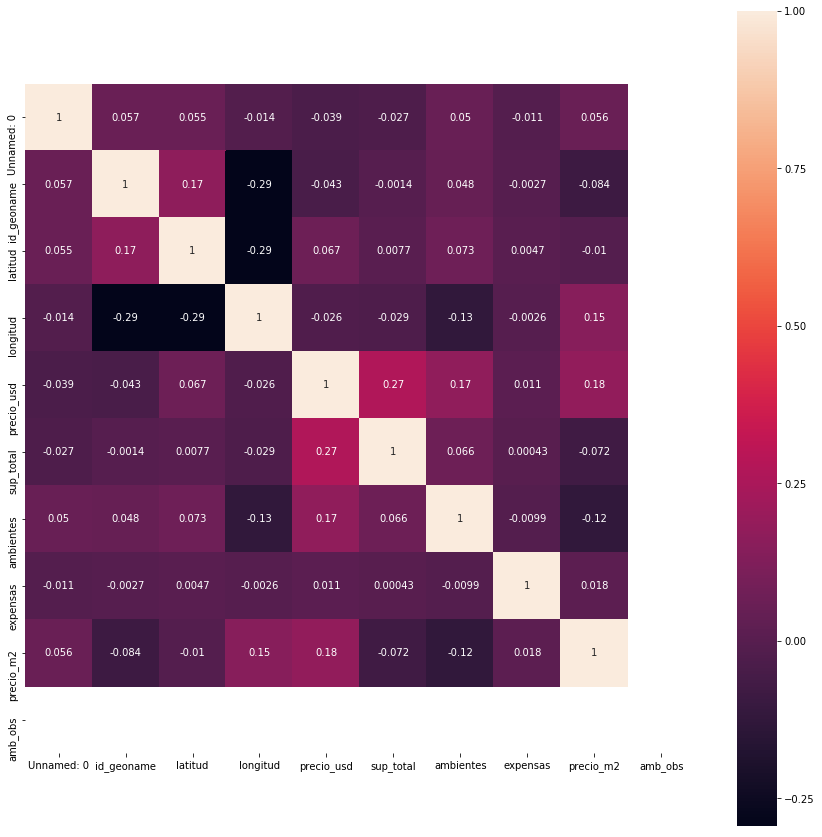

In [23]:
#Como se relacionan las features entre si?
#Graficos la matriz de correlacion

fig, ax = plt.subplots(figsize=(15,15))       
sns.heatmap(df.corr() , square=True, annot=True, ax=ax);

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121217 entries, 0 to 121216
Data columns (total 19 columns):
Unnamed: 0       121217 non-null int64
tipo_inmueble    121217 non-null object
barrio           121217 non-null object
localizacion     121217 non-null object
localidad        121217 non-null object
id_geoname       102500 non-null float64
latitud          69670 non-null float64
longitud         69670 non-null float64
moneda           100806 non-null object
precio_usd       100807 non-null float64
sup_total        108851 non-null float64
ambientes        59252 non-null float64
expensas         14262 non-null float64
observaciones    121215 non-null object
titulo           121217 non-null object
precio_m2        92925 non-null float64
amb_obs          0 non-null float64
amb_tit          27529 non-null object
amb_obse         10267 non-null object
dtypes: float64(9), int64(1), object(9)
memory usage: 13.4+ MB


In [40]:
# Intentaremos predecir las variables de precios y evaluar los modelos para intentar predecir precio_dls y precio_M2_Dls

#df_precio = df.drop(['Precio', 'Precio_ARS','Precio_M2_Dolar', 'Precio_m2'], axis = 1)

df_m2 = df.drop(['precio_usd','precio_m2'], axis = 1)

In [41]:
#df_precio = df_precio.dropna(axis =0 , how = 'any')
df_m2 = df_m2.dropna(axis =0 , how = 'any')

In [30]:
#Dataset Precio total
#df_precio['Provincia'].value_counts()

In [42]:
#Dataset Precio m2
df_m2['localidad'].value_counts()

Series([], Name: localidad, dtype: int64)

# Modelado

In [43]:
#Creamos variables dummies de las variables categoricas

#Provincia
#df_precio = pd.concat([df_precio, pd.get_dummies(data = df_precio['Provincia'], prefix= 'prov')], axis = 1)
df_m2 = pd.concat([df_m2, pd.get_dummies(data = df_m2['localidad'], prefix= 'prov')], axis = 1)

#Barrio
#df_precio = pd.concat([df_precio, pd.get_dummies(data = df_precio['Barrio'], prefix= 'barrio')], axis =1)
df_m2 = pd.concat([df_m2, pd.get_dummies(data = df_m2['barrio'], prefix= 'barrio')], axis = 1)

#Tipo Propiedad
#df_precio = pd.concat([df_precio, pd.get_dummies(data = df_precio['Tipo_Propiedad'], prefix= 'tipo_prop')], axis =1)
df_m2 = pd.concat([df_m2, pd.get_dummies(data = df_m2['tipo_inmueble'], prefix= 'tipo_prop')], axis = 1)

In [44]:
#Dropeo de las columnas originales
#df_precio = df_precio.drop(['Provincia','Barrio','Tipo_Propiedad'], axis = 1)
df_m2 = df_m2.drop(['localidad','barrio','tipo_inmueble'], axis = 1)

In [35]:
# Armar vector objetivo
#Separamos nuestra matriz de features

#X = df_precio.drop(['precio_usd'], axis = 1)
#y = df_precio['precio_usd']

In [137]:
#Separamos en train y test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
# Regresion Lineal
#Instanciamos el modelo

#lm = linear_model.LinearRegression()

#Entrenamos el modelo
#reg_lineal = lm.fit(X_train, y_train)

#Guardamos el score del modelo en una variable para poder comparar
#R2_reg_lin_precio = reg_lineal.score(X_test, y_test)

#Prediccion con el set de testeo

#print('Score de Regresion Lineal:', reg_lineal.score(X_test, y_test))

In [48]:
# Como predecir el mismo modelo el precio por metro cuadrado?
#Separamos nuestra matriz de features

X_m2 = df_m2.drop(['precio_m2'], axis = 1)
y_m2 = df_m2['precio_m2']

In [140]:
#Separamos en train y test
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, test_size=0.25, random_state=1)

# Regresion Lineal

In [141]:
#Instanciamos el modelo

lm_m2 = linear_model.LinearRegression()

#Entrenamos el modelo
reg_lineal_m2 = lm_m2.fit(X_train_m2, y_train_m2)

#Guardamos el score del modelo en una variable para poder comparar
R2_reg_lin_m2 = reg_lineal_m2.score(X_test_m2, y_test_m2)

# Prediccion con el set de testeo

print('Score de Regresion Lineal:', reg_lineal_m2.score(X_test_m2, y_test_m2))

Score de Regresion Lineal: -107469207799.24103


In [142]:
# Comparar los resultados de los dos modelos

print('R2 Modelo Precio: ',R2_reg_lin_precio)
print('Ordenada al origen Modelo Precio: ',reg_lineal.intercept_)
print('R2 Modelo Precio_m2: ', R2_reg_lin_m2)
print('Ordenada al origen Modelo m2: ',reg_lineal_m2.intercept_)

R2 Modelo Precio:  -348422334584.1545
Ordenada al origen Modelo Precio:  6124250586015.853
R2 Modelo Precio_m2:  -107469207799.24103
Ordenada al origen Modelo m2:  54571426042.844284


In [ ]:
#Importamos StandardScaler para normalizar las variables
from sklearn.preprocessing import StandardScaler
scaler_precio = StandardScaler()
X_train = scaler_precio.fit_transform(X_train)

In [ ]:
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

# Regresion Lineal Ridge

In [ ]:
#Instanciamos el modelo

lm_ridge =  linear_model.RidgeCV(alphas= np.linspace(0.1, 100, 10), cv=5)

#Entrenamos el modelo
reg_lineal_ridge = lm_ridge.fit(X_train, y_train)

# Lo utilizamos para predecir en test
X_test = scaler_precio.transform(X_test)

#Guardamos el score en una variable
score_ridge_precio = reg_lineal_ridge.score(X_test, y_test)

#Prediccion con el set de testeo

print('Score del modelo Ridge:', reg_lineal_ridge.score(X_test, y_test))

# Como predice el precio en metros cuadrados

In [ ]:
#Normalizamos las features

scaler_m2 = StandardScaler()
X_train_m2 = scaler_m2.fit_transform(X_train_m2)

In [ ]:
print('media:',np.mean(X_train_m2[:,1]))
print('desvio:',np.std(X_train_m2[:,1]))

In [ ]:
#Instanciamos el modelo
lm_ridge_m2 =  linear_model.RidgeCV(alphas=np.linspace(0.1, 100, 10), cv=5)

#Entrenamos el modelo
reg_lineal_ridge_m2 = lm_ridge_m2.fit(X_train_m2, y_train_m2)

# Lo utilizamos para predecir en test
X_test_m2 = scaler_m2.transform(X_test_m2)

score_ridge_m2 = reg_lineal_ridge_m2.score(X_test_m2, y_test_m2)

#Prediccion con el set de testeo
print('Score del modelo Ridge:', reg_lineal_ridge_m2.score(X_test_m2, y_test_m2))

# Comparar resultados de los 2 modelos

In [ ]:
print('Score Ridge Precio: ', score_ridge_precio)
print('Alpha Ridge Precio: ', reg_lineal_ridge.alpha_)
print('Ordenada al origen Precio: ', reg_lineal_ridge.intercept_)
print('Score Ridge m2: ', score_ridge_m2)
print('Alpha Ridge m2: ', reg_lineal_ridge_m2.alpha_)
print('Ordenada al origen m2: ', reg_lineal_ridge_m2.intercept_)

# Regresion Lasso

In [ ]:
#Instanciamos el modelo
lm_lasso =  linear_model.LassoCV(alphas=np.linspace(0.1, 100, 10), cv = 5)

#Entrenamos el modelo
reg_lineal_lasso = lm_lasso.fit(X_train, y_train)

#Guardamos el score
score_lasso_precio = reg_lineal_lasso.score(X_test, y_test)

print('Score del modelo Lasso:', reg_lineal_lasso.score(X_test, y_test))

# Como funciona el modelo para el precio en metros cuadrados

In [ ]:
#Instanciamos el modelo
lm_lasso_m2 =  linear_model.LassoCV(alphas=np.linspace(0.1, 100, 10), cv = 5)

#Entrenamos el modelo
reg_lineal_lasso_m2 = lm_lasso_m2.fit(X_train_m2, y_train_m2)

#Guardamos el score
score_lasso_m2 = reg_lineal_lasso_m2.score(X_test_m2, y_test_m2)

print('Score del modelo Lasso:', reg_lineal_lasso_m2.score(X_test_m2, y_test_m2))

In [ ]:
print('Score Lasso Precio: ', score_lasso_precio)
print('Ordenada al origen Lasso Precio: ', reg_lineal_lasso.intercept_)
print('Alpha Lasso Precio: ', reg_lineal_lasso.alpha_)
print('Score Lasso m2: ', score_lasso_m2)
print('Ordenada al origen Lasso m2: ', reg_lineal_lasso_m2.intercept_)
print('Alpha Lasso m2: ', reg_lineal_lasso_m2.alpha_)

# Aplicar Modelos para Capital Federal

In [ ]:
df_cap = df.loc[df['Provincia']=='Capital Federal']

In [ ]:
Cap_precio = df_cap.drop(['Precio', 'Precio_ARS','Precio_m2_Dls', 'Precio_m2'], axis = 1)

Cap_m2 = df_cap.drop(['Precio', 'Precio_Dolares','Precio_m2', 'Precio_ARS'], axis = 1)

In [ ]:
Cap_precio = Cap_precio.dropna(axis =0 , how = 'any')
Cap_m2 = Cap_m2.dropna(axis =0 , how = 'any')

In [ ]:
#Creamos variables dummies de las variables categoricas

#Barrio
Cap_precio = pd.concat([Cap_precio, pd.get_dummies(data = Cap_precio['Barrio'], prefix= 'barrio')], axis =1)
Cap_m2 = pd.concat([Cap_m2, pd.get_dummies(data = Cap_m2['Barrio'], prefix= 'barrio')], axis = 1)

#Tipo Propiedad
Cap_precio = pd.concat([Cap_precio, pd.get_dummies(data = Cap_precio['Tipo_Propiedad'], prefix= 'tipo_prop')], axis =1)
Cap_m2 = pd.concat([Cap_m2, pd.get_dummies(data = Cap_m2['Tipo_Propiedad'], prefix= 'tipo_prop')], axis = 1)

In [ ]:
#Dropeo de las columnas originales
Cap_precio = Cap_precio.drop(['Provincia','Barrio','Tipo_Propiedad'], axis = 1)
Cap_m2 = Cap_m2.drop(['Provincia','Barrio','Tipo_Propiedad'], axis = 1)

In [ ]:
Cap_m2 = Cap_m2.drop(['Provincia','Barrio','Tipo_Propiedad'], axis = 1)

In [ ]:
#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_Cap, y_Cap, test_size=0.10, random_state=1)

# Regresion Lineal Capital Federal

In [ ]:
#Instanciamos el modelo

lm_Cap = linear_model.LinearRegression()

#Entrenamos el modelo
reg_lineal_Cap = lm_Cap.fit(X_train, y_train)

#Guardamos el score del modelo en una variable para poder comparar
R2_reg_lin_precio_Cap = reg_lineal_Cap.score(X_test, y_test)

#Prediccion con el set de testeo

print('Score del Regresion Lineal:', reg_lineal_Cap.score(X_test, y_test))

In [ ]:
# Ci¿omo predice el modelo en precio cuadrado
#Separamos nuestra matriz de features

X_Cap_m2 = Cap_m2.drop(['Precio_m2_Dls'], axis = 1)
y_Cap_m2 = Cap_m2['Precio_m2_Dls']

In [ ]:
#Separamos en train y test
X_train_cap_m2, X_test_cap_m2, y_train_cap_m2, y_test_cap_m2 = train_test_split(X_Cap_m2, y_Cap_m2, test_size=0.10, random_state=1)

In [ ]:
#Instanciamos el modelo

lm_Cap_m2 = linear_model.LinearRegression()

#Entrenamos el modelo
reg_lineal_Cap_m2 = lm_Cap_m2.fit(X_train_cap_m2, y_train_cap_m2)

#Guardamos el score del modelo en una variable para poder comparar
R2_reg_lin_Cap_m2 = reg_lineal_Cap_m2.score(X_test_cap_m2, y_test_cap_m2)

#Prediccion con el set de testeo

print('Score del Regresion Lineal:', reg_lineal_Cap_m2.score(X_test_cap_m2, y_test_cap_m2))

# Regresion Lineal Ridge Capital

In [ ]:
#Normalizamos X_train
scaler_precio_cap = StandardScaler()
X_train = scaler_precio_cap.fit_transform(X_train)

#Chequeamos la media y el desvio
print('media:',np.mean(X_train[:,1]))
print('desvio:',np.std(X_train[:,1]))

In [ ]:
#Instanciamos el modelo
lm_ridge_cap_precio =  linear_model.RidgeCV(alphas= np.linspace(0.1, 100, 10), cv=5)

#Entrenamos el modelo
reg_lineal_ridge_cap_precio = lm_ridge_cap_precio.fit(X_train, y_train)

# Lo utilizamos para predecir en test
X_test = scaler_precio_cap.transform(X_test)

#Guardamos el score en una variable
score_ridge_cap_precio = reg_lineal_ridge_cap_precio.score(X_test, y_test)

#Prediccion con el set de testeo
print('Score del modelo Ridge:', reg_lineal_ridge_cap_precio.score(X_test, y_test))

In [ ]:
# Como predice el modelo por metro cuadrado
#Normalizamos las features

scaler_cap_m2 = StandardScaler()
X_train_cap_m2 = scaler_cap_m2.fit_transform(X_train_cap_m2)

#Chequeamos la media y el desvio
print('media:',np.mean(X_train_cap_m2[:,1]))
print('desvio:',np.std(X_train_cap_m2[:,1]))

In [ ]:
#Instanciamos el modelo
lm_ridge_cap_m2 =  linear_model.RidgeCV(alphas=np.linspace(0.1, 100, 10), cv=5)

#Entrenamos el modelo
reg_lineal_ridge_cap_m2 = lm_ridge_cap_m2.fit(X_train_cap_m2, y_train_cap_m2)

# Lo utilizamos para predecir en test
X_test_cap_m2 = scaler_cap_m2.transform(X_test_cap_m2)

score_ridge_cap_m2 = reg_lineal_ridge_cap_m2.score(X_test_cap_m2, y_test_cap_m2)

#Prediccion con el set de testeo
print('Score del modelo Ridge:', reg_lineal_ridge_cap_m2.score(X_test_cap_m2, y_test_cap_m2))

In [ ]:
print('Score Ridge Precio: ', score_ridge_cap_precio)
print('Alpha Ridge Precio: ', reg_lineal_ridge_cap_precio.alpha_)
print('Score Ridge m2: ', score_ridge_cap_m2)
print('Alpha Ridge m2: ', reg_lineal_ridge_cap_m2.alpha_)

# Regresion Lasso para Capital

In [ ]:
#Instanciamos el modelo
lm_lasso_cap =  linear_model.LassoCV(alphas=np.linspace(0.1, 100, 10), cv = 5)

#Entrenamos el modelo
reg_lineal_lasso_cap = lm_lasso_cap.fit(X_train, y_train)

#Guardamos el score
score_lasso_cap_precio = reg_lineal_lasso_cap.score(X_test, y_test)

print('Score del modelo Lasso:', reg_lineal_lasso_cap.score(X_test, y_test))

In [ ]:
#Instanciamos el modelo
lm_lasso_cap_m2 =  linear_model.LassoCV(alphas=np.linspace(0.1, 100, 10), cv = 5)

#Entrenamos el modelo
reg_lineal_lasso_cap_m2 = lm_lasso_cap_m2.fit(X_train_m2, y_train_m2)

#Guardamos el score
score_lasso_cap_m2 = reg_lineal_lasso_cap_m2.score(X_test_m2, y_test_m2)

print('Score del modelo Lasso:', reg_lineal_lasso_cap_m2.score(X_test_m2, y_test_m2))

In [ ]:
print('Score Lasso Precio: ', score_lasso_cap_precio)
print('Alpha Lasso Precio: ', reg_lineal_lasso_cap.alpha_)
print('Score Lasso m2: ', score_lasso_cap_m2)
print('Alpha Lasso m2: ', reg_lineal_lasso_cap_m2.alpha_)

# Elastic Net para Capital

In [ ]:
#Instanciamos el modelo

lm_elastic_net_cap =  linear_model.ElasticNetCV(l1_ratio= [.1, .5, .7, .9, .95, .99, 1],cv = 5)

#Entrenamos el modelo
elastic_net_cap = lm_elastic_net_cap.fit(X_train, y_train)

#Guardamos el score
score_EN_cap_precio = elastic_net_cap.score(X_test, y_test)

#Prediccion con el set de testeo

print('Score del modelo Elastic Net:', elastic_net_cap.score(X_test, y_test))

In [ ]:
#Instanciamos el modelo

lm_elastic_net_cap_m2 =  linear_model.ElasticNetCV(l1_ratio= [.1, .5, .7, .9, .95, .99, 1], alphas = [10, 100, 10],cv = 5)

#Entrenamos el modelo
elastic_net_cap_m2 = lm_elastic_net_cap_m2.fit(X_train_cap_m2, y_train_cap_m2)

#Guardamos el score
score_EN_cap_m2 = elastic_net_cap_m2.score(X_test_cap_m2, y_test_cap_m2)

#Prediccion con el set de testeo

print('Score del modelo Elastic Net:', elastic_net_cap_m2.score(X_test_cap_m2, y_test_cap_m2))

In [ ]:
print('Score Elastic Net Precio: ', score_EN_cap_precio)
print('Alpha Elastic Net Precio: ', elastic_net_cap.alpha_)
print('l1_ratio Elastic Net Precio: ', elastic_net_cap.l1_ratio_)
print('Score Elastic Net m2: ', score_EN_cap_m2)
print('Alpha Elastic Net m2: ', elastic_net_cap_m2.alpha_)
print('l1_ratio Elastic Net m2: ', elastic_net_cap_m2.l1_ratio_)